In [ ]:
## modeling on the whole data set 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None 
import math
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
Data_To_Model = pd.read_csv("C:/Users/umaho/OneDrive/Desktop/Flipose/Clean_out/Data_Transaction_Dummies.csv")

In [9]:
Data_To_Model.shape

(1148886, 66)

In [10]:
Data_To_Model.head()

,Unnamed: 0,transaction_id,procedure_id,trans_group_id,trans_group_en,procedure_name_en,instance_date,property_type_id,property_type_en,property_sub_type_id,...,Property_Unit,Property_Villa,Fam_landmarks,close_DubaiMall,Close_Marina_EmiratesMall,Close_MIRDIF_IBNMall,Rooms_3_4,Rooms_moreThan_4,Rooms_Studio_Single,Rooms_Commercial
0,2,1-11-2016-12930,11,1,sales,Sell,2016-11-02,4,villa,NaN,...,0,1,1,1,0,0,0,0,0,0
1,3,1-11-2005-300028,11,1,sales,Sell,2005-02-28,4,villa,NaN,...,0,1,1,1,0,0,0,0,0,0
2,5,1-11-2013-7839,11,1,sales,Sell,2013-03-12,4,villa,NaN,...,0,1,1,1,0,0,0,0,0,0
3,7,1-11-2023-32261,11,1,sales,Sell,2023-10-09,2,building,NaN,...,0,0,1,1,0,0,0,0,0,0
4,9,1-11-2023-33947,11,1,sales,Sell,2023-10-23,2,building,NaN,...,0,0,1,1,0,0,0,0,0,0


In [14]:
print(Data_To_Model.columns.values)

['Unnamed: 0' 'transaction_id' 'procedure_id' 'trans_group_id'
 'trans_group_en' 'procedure_name_en' 'instance_date' 'property_type_id'
 'property_type_en' 'property_sub_type_id' 'property_sub_type_en'
 'property_usage_en' 'reg_type_id' 'reg_type_en' 'area_id' 'area_name_en'
 'building_name_en' 'project_number' 'project_name_en' 'master_project_en'
 'nearest_landmark_en' 'nearest_metro_en' 'nearest_mall_en' 'rooms_en'
 'has_parking' 'procedure_area' 'actual_worth' 'meter_sale_price'
 'rent_value' 'meter_rent_price' 'no_of_parties_role_1'
 'no_of_parties_role_2' 'no_of_parties_role_3' 'instance_Year'
 'instance_Month' 'instance_Day' 'trans_X_1' 'trans_X_2' 'Trans_Year'
 'trans_X_3' 'Year_Range' 'YearBin_2000-2004' 'YearBin_2005-2009'
 'YearBin_2010-2014' 'YearBin_2015-2019' 'YearBin_2020-2024'
 'usage_residential' 'usage_hospitality' 'Off_Plan_Reg'
 'trans_group_gifts' 'trans_group_sales' 'rooms_1 b/r_2 b/r_3 b/r'
 'rooms_4 b/r_5 b/r_6 b/r' 'common_rooms' 'small_rooms'
 'Property_Buildi

In [18]:
Data_To_Model[['meter_sale_price', 'procedure_area']].corr()

,meter_sale_price,procedure_area
meter_sale_price,1.000000,-0.190835
procedure_area,-0.190835,1.000000


In [20]:
#Split the data into training (70%) and test (30%)
train, test = train_test_split(Data_To_Model, test_size=0.3)

In [22]:
train.shape

(804220, 66)

In [24]:
## simple basic model

x = train[['procedure_area']]
y = train['meter_sale_price']
x = sm.add_constant(x)
model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       meter_sale_price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                 3.022e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:43:29   Log-Likelihood:            -8.1423e+06
No. Observations:              804220   AIC:                         1.628e+07
Df Residuals:                  804218   BIC:                         1.628e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.421e+04     11.796   1204.617      0.000    1.42e+04    1.42e+04
procedure_area   -13.5171      0.078   -173.827      0.000     -13.670     -13.365
==============================================================================
Omnibus:                    63328.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79745.719
Skew:                           0.771   Prob(JB):                         0.00
Kurtosis:                       3.042   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\umaho\AppData\Local\Temp\ipykernel_11560\1917567307.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = model.params[0] + model.params[1] * x_range


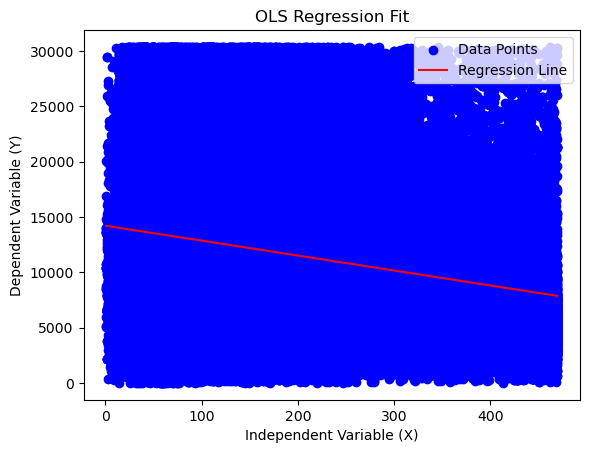

In [27]:
plt.scatter(train['procedure_area'], train['meter_sale_price'], color='blue', label='Data Points')

x_range = np.linspace(train['procedure_area'].min(), train['procedure_area'].max(), 100)
y_pred = model.params[0] + model.params[1] * x_range 

plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('OLS Regression Fit')
plt.legend()
plt.show()

In [45]:
#Model 2
## Adding all variables to the model

x = train[['procedure_area', 'usage_residential','usage_hospitality','Off_Plan_Reg', 
 'trans_group_gifts','trans_group_sales',
 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 
 'close_DubaiMall', 'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 
 'Rooms_3_4' , 'Rooms_moreThan_4', 'Rooms_Studio_Single', 'Rooms_Commercial']]
y = train['meter_sale_price']
x = sm.add_constant(x)
model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       meter_sale_price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                 2.519e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:04:18   Log-Likelihood:            -7.9855e+06
No. Observations:              804220   AIC:                         1.597e+07
Df Residuals:                  804202   BIC:                         1.597e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.019e+04     39.064    260.925      0.000    1.01e+04    1.03e+04
procedure_area               -7.2228      0.100    -72.451      0.000      -7.418      -7.027
usage_residential           108.9527     33.940      3.210      0.001      42.432     175.473
usage_hospitality          4480.6025     50.413     88.879      0.000    4381.795    4579.410
Off_Plan_Reg               3775.8036     13.116    287.873      0.000    3750.096    3801.511
trans_group_gifts          2348.8139     32.518     72.231      0.000    2285.079    2412.549
trans_group_sales          2336.6600     15.935    146.640      0.000    2305.428    2367.891
Property_Building         -1658.7052     84.424    -19.647      0.000   -1824.173   -1493.237
Property_Unit             -1105.5003     42.813    -25.821      0.000   -1189.413   -1021.588
Property_Villa            -2601.6627     42.002    -61.942      0.000   -2683.985   -2519.341
Fam_landmarks              3063.0704     15.838    193.398      0.000    3032.028    3094.113
close_DubaiMall            1940.2090     23.312     83.228      0.000    1894.519    1985.899
Close_Marina_EmiratesMall  -523.2371     16.343    -32.016      0.000    -555.268    -491.206
Close_MIRDIF_IBNMall      -2377.5505     20.729   -114.698      0.000   -2418.178   -2336.923
Rooms_3_4                   654.2873     19.358     33.799      0.000     616.346     692.228
Rooms_moreThan_4            881.5140     91.954      9.587      0.000     701.288    1061.740
Rooms_Studio_Single        -790.0271     17.367    -45.491      0.000    -824.066    -755.989
Rooms_Commercial          -2326.0453     41.833    -55.603      0.000   -2408.036   -2244.054
==============================================================================
Omnibus:                    54405.780   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67709.586
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                       3.571   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# model validation:

x_test = test[['procedure_area', 'usage_residential','usage_hospitality','Off_Plan_Reg', 
 'trans_group_gifts','trans_group_sales',
 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 
 'close_DubaiMall', 'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 
 'Rooms_3_4' , 'Rooms_moreThan_4', 'Rooms_Studio_Single', 'Rooms_Commercial']]
x_test = sm.add_constant(x_test)
y_test = test['meter_sale_price']
y_pred = model.predict(x_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")


Mean squared error: 24852685.73
Coefficient of determination: 0.35


In [51]:
print(y_test, y_pred)

671671      7687.58
436742     19913.27
1122056    14688.69
17664      19375.01
841434     16024.25
             ...   
942344     11433.80
848756      9343.76
477924      4751.93
754941      5795.45
126641      9272.55
Name: meter_sale_price, Length: 344666, dtype: float64 671671      7179.898319
436742     19820.580805
1122056    14157.552536
17664      15866.970337
841434     13238.823875
               ...     
942344     10439.139708
848756     13436.358723
477924      8863.983275
754941      8047.485101
126641      8325.930375
Length: 344666, dtype: float64


In [49]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
data_results = {
    'model name': ['ols'],
    'r2': [r2],
    'MSE': [MSE]
       }

score_df = pd.DataFrame(data_results)
score_df

,model name,r2,MSE
0,ols,0.348681,2.485269e+07


In [41]:
#Model 3
## Adding all variables to the model
## adding time variable into model

x = train[['procedure_area', 'usage_residential','usage_hospitality','Off_Plan_Reg', 
 'trans_group_gifts','trans_group_sales',
 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 
 'close_DubaiMall', 'Close_MIRDIF_IBNMall', 
 'Rooms_3_4' , 'Rooms_moreThan_4', 'Rooms_Studio_Single', 'Rooms_Commercial', 'YearBin_2000-2004','YearBin_2005-2009', 
 'YearBin_2010-2014', 'YearBin_2015-2019','YearBin_2020-2024']]
y = train['meter_sale_price']
x = sm.add_constant(x)
model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       meter_sale_price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                 2.725e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:00:30   Log-Likelihood:            -7.9410e+06
No. Observations:              804220   AIC:                         1.588e+07
Df Residuals:                  804198   BIC:                         1.588e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e+04     43.375    288.037      0.000    1.24e+04    1.26e+04
procedure_area          -4.9027      0.094    -51.935      0.000      -5.088      -4.718
usage_residential     -474.4456     32.164    -14.751      0.000    -537.486    -411.405
usage_hospitality     3919.2940     47.789     82.012      0.000    3825.629    4012.959
Off_Plan_Reg          3480.6359     12.539    277.582      0.000    3456.060    3505.212
trans_group_gifts     1824.6628     30.877     59.095      0.000    1764.146    1885.180
trans_group_sales     2463.6735     15.149    162.630      0.000    2433.982    2493.365
Property_Building     2317.7624     84.499     27.429      0.000    2152.147    2483.378
Property_Unit          216.3301     40.008      5.407      0.000     137.916     294.744
Property_Villa       -1223.1198     39.855    -30.689      0.000   -1301.235   -1145.005
Fam_landmarks         3595.7538     14.403    249.645      0.000    3567.524    3623.984
close_DubaiMall       1767.5296     17.273    102.331      0.000    1733.676    1801.383
Close_MIRDIF_IBNMall -1736.2553     16.743   -103.698      0.000   -1769.072   -1703.439
Rooms_3_4              354.3799     18.305     19.359      0.000     318.502     390.258
Rooms_moreThan_4       240.9855     87.042      2.769      0.006      70.386     411.585
Rooms_Studio_Single   -549.4471     16.405    -33.492      0.000    -581.601    -517.293
Rooms_Commercial     -2250.4759     39.574    -56.867      0.000   -2328.040   -2172.912
YearBin_2000-2004     -1.19e+04    105.441   -112.867      0.000   -1.21e+04   -1.17e+04
YearBin_2005-2009    -6930.1888     31.416   -220.592      0.000   -6991.764   -6868.614
YearBin_2010-2014    -5007.4438     28.407   -176.277      0.000   -5063.120   -4951.768
YearBin_2015-2019    -4875.8765     27.933   -174.555      0.000   -4930.624   -4821.128
YearBin_2020-2024    -2552.1146     26.353    -96.844      0.000   -2603.765   -2500.464
==============================================================================
Omnibus:                    53993.811   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69888.502
Skew:                           0.622   Prob(JB):                         0.00
Kurtosis:                       3.735   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
## all data above 2025 - 
from datetime import datetime
Data_To_Model['instance_date'] = pd.to_datetime(Data_To_Model['instance_date'])
Data_To_Model_2020 = Data_To_Model[(Data_To_Model['instance_date'].dt.year) >= 2020]
Data_To_Model_2020.shape


(587889, 66)

In [73]:
#Split the data into training (70%) and test (30%)
train_2020, test_2020 = train_test_split(Data_To_Model_2020, test_size=0.3)

In [75]:
train_2020[['meter_sale_price', 'procedure_area']].corr()

,meter_sale_price,procedure_area
meter_sale_price,1.000000,-0.225786
procedure_area,-0.225786,1.000000


In [77]:
## Model 4
## Modeling the recent data - 2020 onwards
x = train_2020[['procedure_area', 'usage_residential','usage_hospitality','Off_Plan_Reg', 
 'trans_group_gifts','trans_group_sales',
 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 
 'close_DubaiMall', 'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 
 'Rooms_3_4' , 'Rooms_moreThan_4', 'Rooms_Studio_Single', 'Rooms_Commercial']]
y = train_2020['meter_sale_price']
x = sm.add_constant(x)
model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       meter_sale_price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.520e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:17:34   Log-Likelihood:            -4.0944e+06
No. Observations:              411522   AIC:                         8.189e+06
Df Residuals:                  411504   BIC:                         8.189e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.023e+04     50.979    200.727      0.000    1.01e+04    1.03e+04
procedure_area               -5.2190      0.140    -37.305      0.000      -5.493      -4.945
usage_residential          -466.3278     52.476     -8.887      0.000    -569.179    -363.477
usage_hospitality          3013.3041     75.923     39.689      0.000    2864.498    3162.111
Off_Plan_Reg               4681.3494     19.201    243.806      0.000    4643.716    4718.983
trans_group_gifts          2235.4031     43.670     51.188      0.000    2149.811    2320.996
trans_group_sales          2972.7590     24.334    122.164      0.000    2925.065    3020.453
Property_Building           696.7319    218.563      3.188      0.001     268.354    1125.109
Property_Unit              -141.6137     58.987     -2.401      0.016    -257.226     -26.001
Property_Villa            -2231.7532     58.861    -37.916      0.000   -2347.119   -2116.387
Fam_landmarks              4606.9272     25.664    179.510      0.000    4556.627    4657.228
close_DubaiMall            -173.1149     34.636     -4.998      0.000    -241.001    -105.229
Close_Marina_EmiratesMall -1137.7156     22.525    -50.509      0.000   -1181.864   -1093.567
Close_MIRDIF_IBNMall      -2536.9166     30.448    -83.319      0.000   -2596.594   -2477.239
Rooms_3_4                   658.8399     28.259     23.314      0.000     603.453     714.226
Rooms_moreThan_4           1007.0235    125.873      8.000      0.000     760.316    1253.731
Rooms_Studio_Single        -924.3395     24.718    -37.395      0.000    -972.786    -875.893
Rooms_Commercial          -2977.9283     72.623    -41.006      0.000   -3120.267   -2835.590
==============================================================================
Omnibus:                    12532.550   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13707.880
Skew:                           0.440   Prob(JB):                         0.00
Kurtosis:                       3.153   Cond. No.                     4.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#For model validation:

x_test = test_2020[[ 'procedure_area', 'usage_residential','usage_hospitality','Off_Plan_Reg', 
 'trans_group_gifts','trans_group_sales',
 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 
 'close_DubaiMall', 'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 
 'Rooms_3_4' , 'Rooms_moreThan_4', 'Rooms_Studio_Single', 'Rooms_Commercial']]
x_test = sm.add_constant(x_test)
y_test = test_2020['meter_sale_price']
y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
data_results = {
    'model name': ['ols'],
    'r2': [r2],
    'MSE': [MSE]
       }

score_df = pd.DataFrame(data_results)
score_df

,model name,r2,MSE
0,ols,0.385374,2.570768e+07


In [115]:
## stepwise regression
#!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [117]:
x = train_2020[['procedure_area', 'usage_residential','usage_hospitality','Off_Plan_Reg', 
 'trans_group_gifts','trans_group_sales',
 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 
 'close_DubaiMall', 'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 
 'Rooms_3_4' , 'Rooms_moreThan_4', 'Rooms_Studio_Single', 'Rooms_Commercial']]
y = train_2020['meter_sale_price']



model = LinearRegression()
sfs = SFS(model, k_features='best', forward=True, scoring='r2', cv=5)
sfs.fit(x, y)

print(f"Selected features: {sfs.k_feature_names_}")

Selected features: ('procedure_area', 'usage_residential', 'usage_hospitality', 'Off_Plan_Reg', 'trans_group_gifts', 'trans_group_sales', 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 'close_DubaiMall', 'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 'Rooms_3_4', 'Rooms_moreThan_4', 'Rooms_Studio_Single', 'Rooms_Commercial')


In [119]:
## Model 5  - final model from the results of stepwise regression:


x = train_2020[['procedure_area', 'usage_residential', 'usage_hospitality', 'Off_Plan_Reg', 'trans_group_gifts', 
                'trans_group_sales', 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 'close_DubaiMall', 
                'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 'Rooms_3_4', 'Rooms_moreThan_4', 'Rooms_Studio_Single', 
                'Rooms_Commercial']]
y = train_2020['meter_sale_price']
x = sm.add_constant(x)
model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       meter_sale_price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.520e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:39:01   Log-Likelihood:            -4.0944e+06
No. Observations:              411522   AIC:                         8.189e+06
Df Residuals:                  411504   BIC:                         8.189e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.023e+04     50.979    200.727      0.000    1.01e+04    1.03e+04
procedure_area               -5.2190      0.140    -37.305      0.000      -5.493      -4.945
usage_residential          -466.3278     52.476     -8.887      0.000    -569.179    -363.477
usage_hospitality          3013.3041     75.923     39.689      0.000    2864.498    3162.111
Off_Plan_Reg               4681.3494     19.201    243.806      0.000    4643.716    4718.983
trans_group_gifts          2235.4031     43.670     51.188      0.000    2149.811    2320.996
trans_group_sales          2972.7590     24.334    122.164      0.000    2925.065    3020.453
Property_Building           696.7319    218.563      3.188      0.001     268.354    1125.109
Property_Unit              -141.6137     58.987     -2.401      0.016    -257.226     -26.001
Property_Villa            -2231.7532     58.861    -37.916      0.000   -2347.119   -2116.387
Fam_landmarks              4606.9272     25.664    179.510      0.000    4556.627    4657.228
close_DubaiMall            -173.1149     34.636     -4.998      0.000    -241.001    -105.229
Close_Marina_EmiratesMall -1137.7156     22.525    -50.509      0.000   -1181.864   -1093.567
Close_MIRDIF_IBNMall      -2536.9166     30.448    -83.319      0.000   -2596.594   -2477.239
Rooms_3_4                   658.8399     28.259     23.314      0.000     603.453     714.226
Rooms_moreThan_4           1007.0235    125.873      8.000      0.000     760.316    1253.731
Rooms_Studio_Single        -924.3395     24.718    -37.395      0.000    -972.786    -875.893
Rooms_Commercial          -2977.9283     72.623    -41.006      0.000   -3120.267   -2835.590
==============================================================================
Omnibus:                    12532.550   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13707.880
Skew:                           0.440   Prob(JB):                         0.00
Kurtosis:                       3.153   Cond. No.                     4.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
#For model validation:

x_test = test_2020[[ 'procedure_area', 'usage_residential', 'usage_hospitality', 'Off_Plan_Reg', 'trans_group_gifts', 
                'trans_group_sales', 'Property_Building', 'Property_Unit', 'Property_Villa', 'Fam_landmarks', 'close_DubaiMall', 
                'Close_Marina_EmiratesMall', 'Close_MIRDIF_IBNMall', 'Rooms_3_4', 'Rooms_moreThan_4', 'Rooms_Studio_Single', 
                'Rooms_Commercial']]
x_test = sm.add_constant(x_test)
y_test = test_2020['meter_sale_price']
y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
data_results = {
    'model name': ['ols'],
    'r2': [r2],
    'MSE': [MSE]
       }

score_df = pd.DataFrame(data_results)
score_df

,model name,r2,MSE
0,ols,0.385374,2.570768e+07
